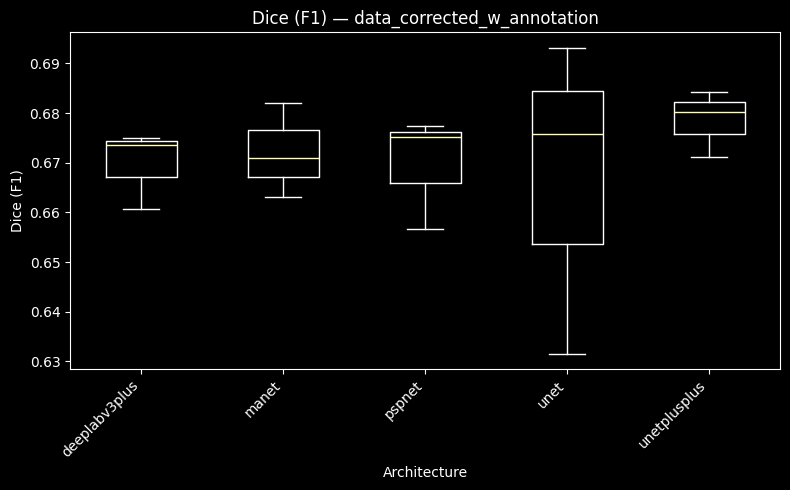

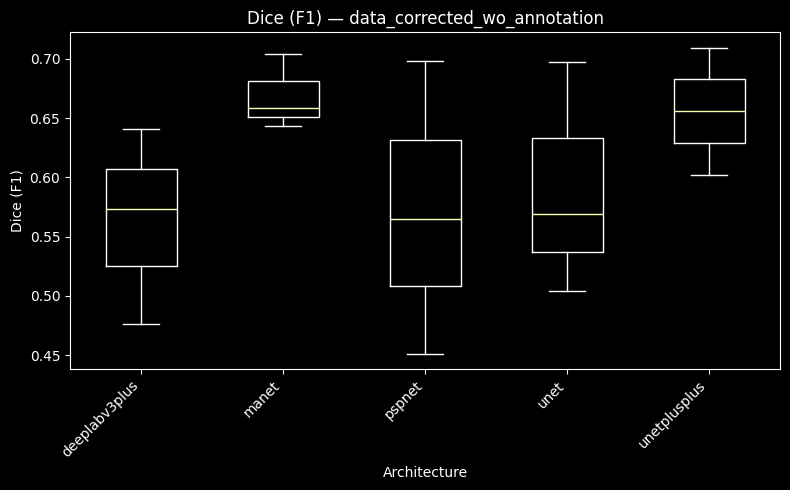

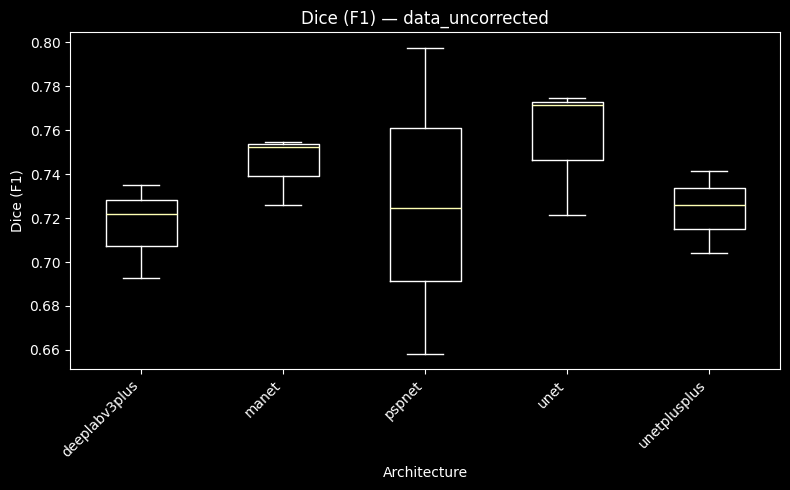

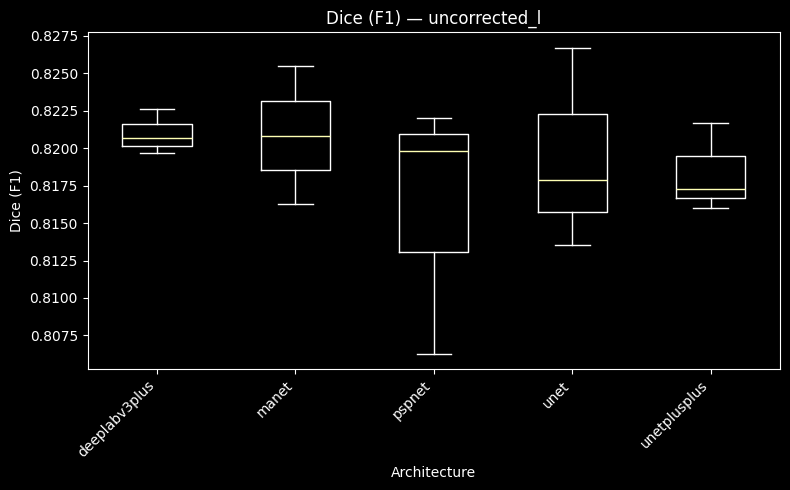

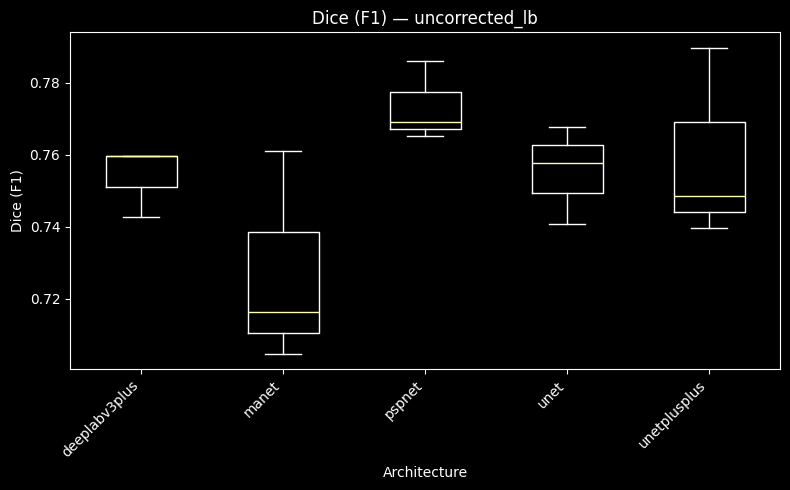

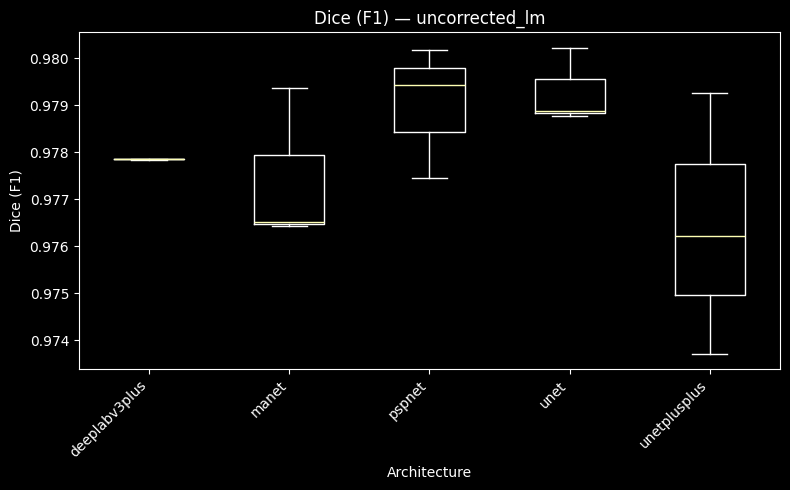

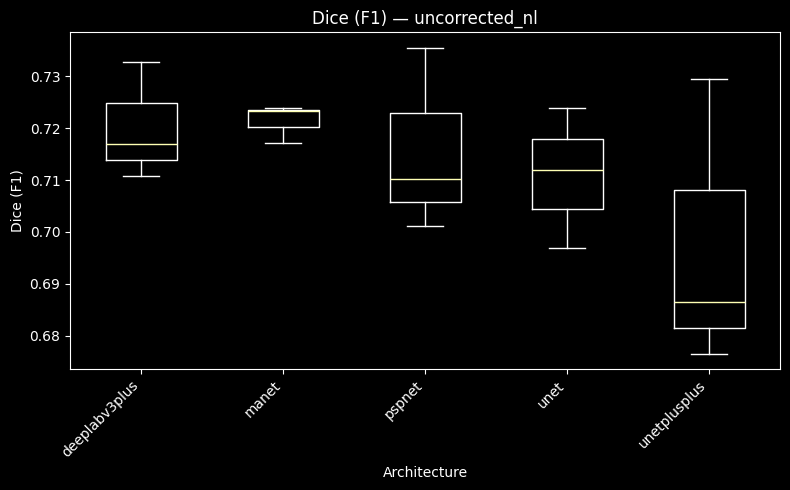

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_labeled.csv'
df = pd.read_csv(file_path)

# 2) Extraer 'group', 'trial' y 'architecture'
def parse_name(name):
    parts = name.split('_')
    m = re.match(r'.*?experiment1_(.+?)_r\d+', name)
    group = m.group(1) if m else None
    trial = next((p for p in parts if re.match(r'^r\d+$', p)), None)
    arch = None
    if trial:
        idx = parts.index(trial)
        if idx + 1 < len(parts):
            arch = parts[idx + 1]
    return pd.Series([group, trial, arch], index=['group','trial','architecture'])

df[['group','trial','architecture']] = df['Name'].apply(parse_name)
df = df.dropna(subset=['group','trial','architecture'])

# 3) Quedarnos solo con la última época de cada corrida
df_last = (
    df
    .sort_values('epoch')
    .groupby(['group','architecture','trial'], as_index=False)
    .last()
)

# 4) Parámetros
groups        = sorted(df_last['group'].unique())
architectures = sorted(df_last['architecture'].unique())
metric_col    = 'valid_dataset_f1'  # Dice (F1)
metric_label  = 'Dice (F1)'

# 5) Para cada grupo, dibujar una figura con 5 boxplots
for group in groups:
    df_g = df_last[df_last['group'] == group]
    # preparar data y etiquetas
    data   = []
    labels = []
    for arch in architectures:
        vals = df_g[df_g['architecture']==arch][metric_col].values
        if len(vals) == 3:   # solo si tenemos r1,r2,r3
            data.append(vals)
            labels.append(arch)
    if not data:
        continue

    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot(data, showfliers=False)
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_xlabel('Architecture')
    ax.set_ylabel(metric_label)
    ax.set_title(f'{metric_label} — {group}')
    plt.tight_layout()
    plt.show()


In [26]:

# 2) Parse 'group', 'trial' and 'architecture'
def parse_name(name):
    parts = name.split('_')
    m = re.match(r'.*?experiment1_(.+?)_r\d+', name)
    group = m.group(1) if m else None
    trial = next((p for p in parts if re.match(r'^r\d+$', p)), None)
    arch = None
    if trial:
        idx = parts.index(trial)
        if idx + 1 < len(parts):
            arch = parts[idx + 1]
    return pd.Series([group, trial, arch], index=['group','trial','architecture'])

df[['group','trial','architecture']] = df['Name'].apply(parse_name)
df = df.dropna(subset=['group','trial','architecture'])

# 3) Keep only the last epoch per (group, arch, trial)
df_last = (
    df
    .sort_values('epoch')
    .groupby(['group','architecture','trial'], as_index=False)
    .last()
)

# 4) Boxplots in English labels
groups        = sorted(df_last['group'].unique())
architectures = sorted(df_last['architecture'].unique())


# 5) Summary table (mean ± std) for all metrics
metrics = {
    'Valid F1'       : 'valid_dataset_f1',
    'Test F1'        : 'test_dataset_f1',
    'Valid IoU'      : 'valid_dataset_iou',
    'Test IoU'       : 'test_dataset_iou',
    'Valid Accuracy' : 'valid_dataset_acc',
    'Test Accuracy'  : 'test_dataset_acc'
}

# Aggregate mean & std
agg_dict = {}
for name, col in metrics.items():
    agg_dict[f'{name} mean'] = (col, 'mean')
    agg_dict[f'{name} std']  = (col, 'std')

summary = (
    df_last
    .groupby(['group','architecture'])
    .agg(**agg_dict)
    .reset_index()
)

# Format "mean ± std"
for name in metrics:
    summary[name] = summary.apply(
        lambda r: f"{r[f'{name} mean']:.3f} ± {r[f'{name} std']:.3f}",
        axis=1
    )

# Keep only the final columns
summary = summary[['group','architecture'] + list(metrics.keys())]

#show summary as df with pandas
summary_df= pd.DataFrame(summary)
summary_df = summary_df.set_index(['group','architecture'])
summary_df = summary_df.rename_axis(index=['Group', 'Architecture'])

# Display the summary table
summary_df

# Save the summary table to a CSV file as labeled_summary.csv
summary_df.to_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/labeled_summary.csv')


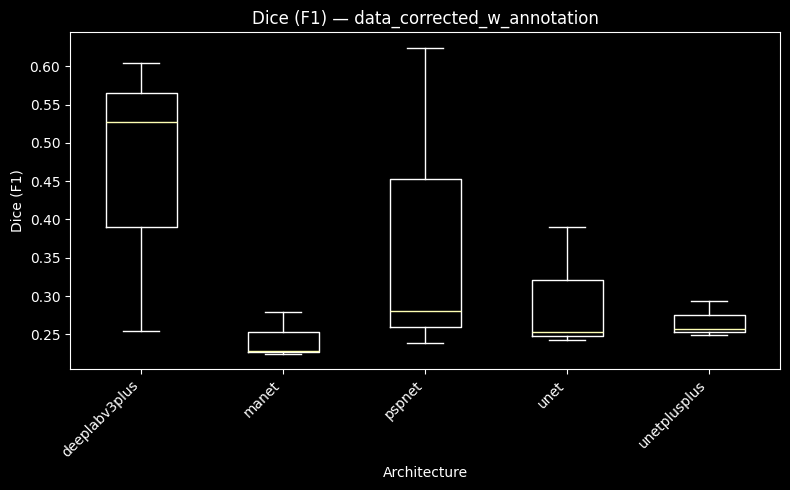

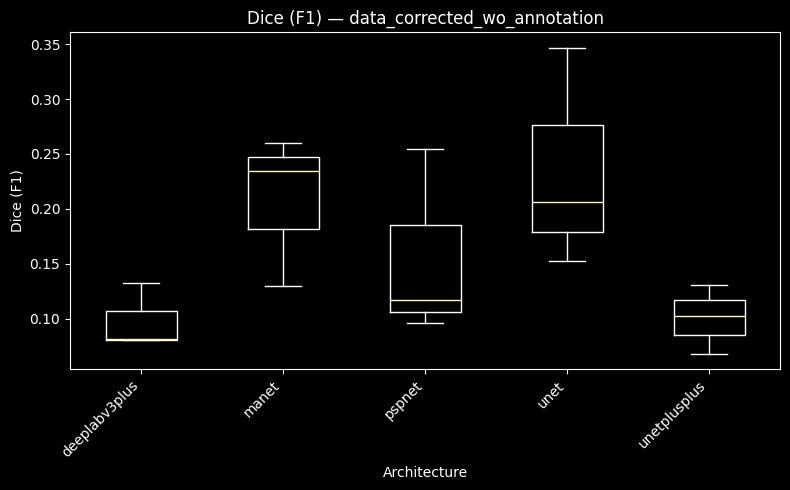

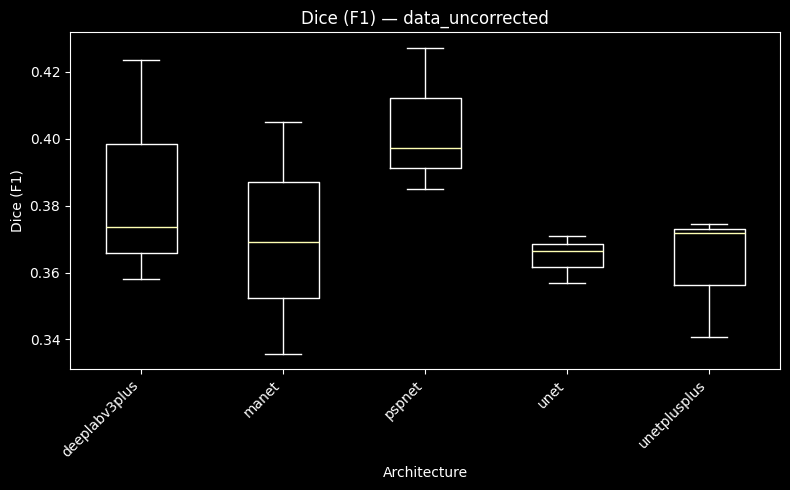

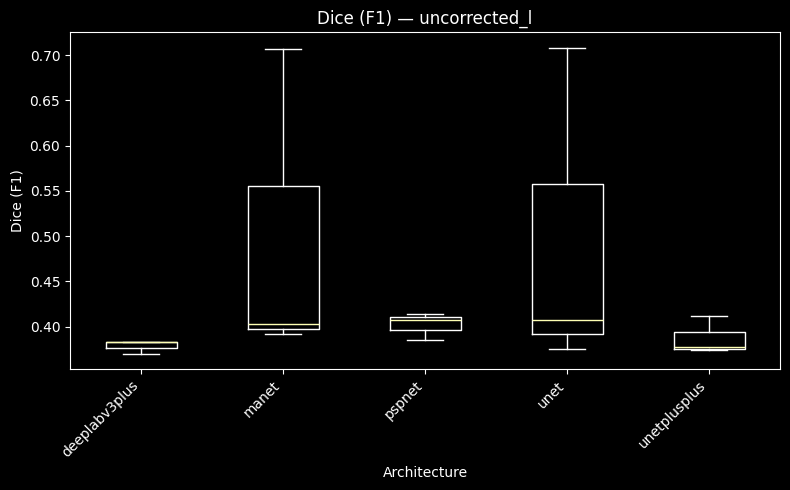

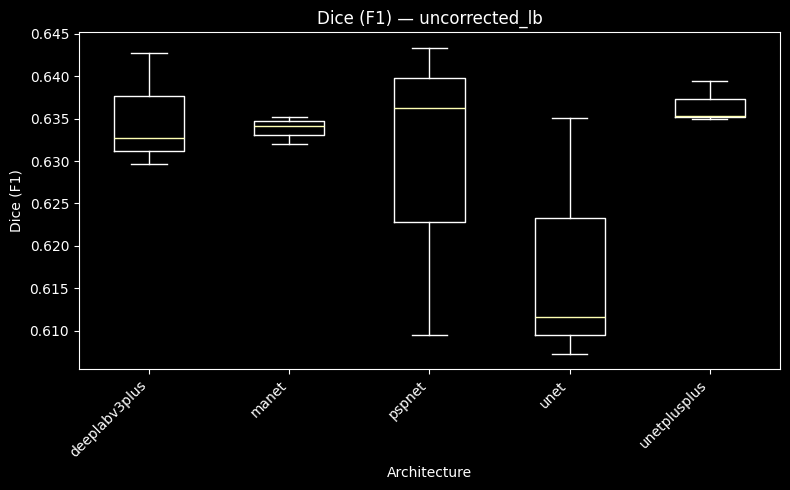

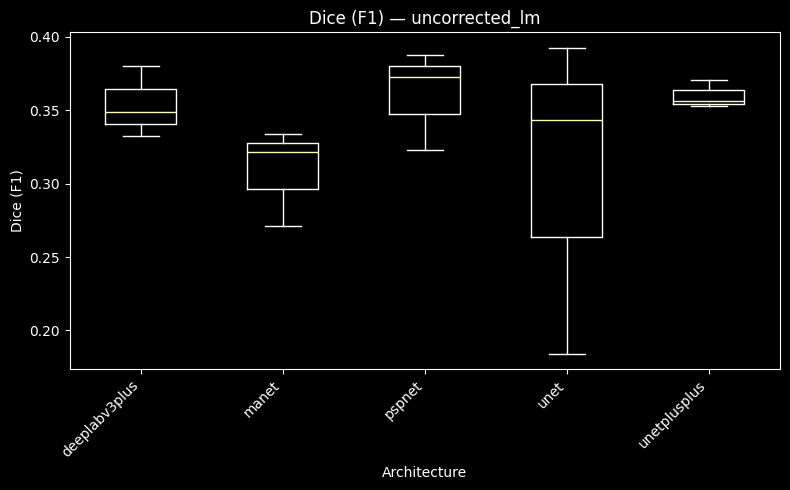

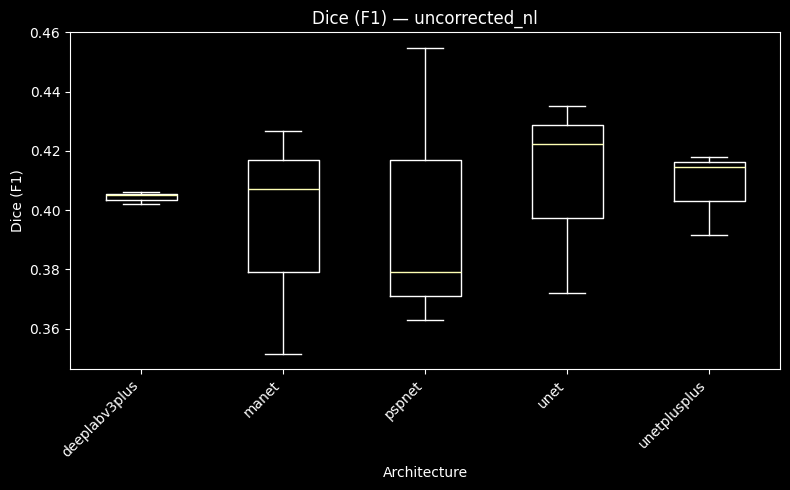

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_unlabeled.csv'
df = pd.read_csv(file_path)

# 2) Extraer 'group', 'trial' y 'architecture'
def parse_name(name):
    parts = name.split('_')
    m = re.match(r'.*?experiment1_(.+?)_r\d+', name)
    group = m.group(1) if m else None
    trial = next((p for p in parts if re.match(r'^r\d+$', p)), None)
    arch = None
    if trial:
        idx = parts.index(trial)
        if idx + 1 < len(parts):
            arch = parts[idx + 1]
    return pd.Series([group, trial, arch], index=['group','trial','architecture'])

df[['group','trial','architecture']] = df['Name'].apply(parse_name)
df = df.dropna(subset=['group','trial','architecture'])

# 3) Quedarnos solo con la última época de cada corrida
df_last = (
    df
    .sort_values('epoch')
    .groupby(['group','architecture','trial'], as_index=False)
    .last()
)

# 4) Parámetros
groups        = sorted(df_last['group'].unique())
architectures = sorted(df_last['architecture'].unique())
metric_col    = 'valid_dataset_f1'  # Dice (F1)
metric_label  = 'Dice (F1)'

# 5) Para cada grupo, dibujar una figura con 5 boxplots
for group in groups:
    df_g = df_last[df_last['group'] == group]
    # preparar data y etiquetas
    data   = []
    labels = []
    for arch in architectures:
        vals = df_g[df_g['architecture']==arch][metric_col].values
        if len(vals) == 3:   # solo si tenemos r1,r2,r3
            data.append(vals)
            labels.append(arch)
    if not data:
        continue

    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot(data, showfliers=False)
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_xlabel('Architecture')
    ax.set_ylabel(metric_label)
    ax.set_title(f'{metric_label} — {group}')
    plt.tight_layout()
    plt.show()


In [28]:

# 2) Parse 'group', 'trial' and 'architecture'
def parse_name(name):
    parts = name.split('_')
    m = re.match(r'.*?experiment1_(.+?)_r\d+', name)
    group = m.group(1) if m else None
    trial = next((p for p in parts if re.match(r'^r\d+$', p)), None)
    arch = None
    if trial:
        idx = parts.index(trial)
        if idx + 1 < len(parts):
            arch = parts[idx + 1]
    return pd.Series([group, trial, arch], index=['group','trial','architecture'])

df[['group','trial','architecture']] = df['Name'].apply(parse_name)
df = df.dropna(subset=['group','trial','architecture'])

# 3) Keep only the last epoch per (group, arch, trial)
df_last = (
    df
    .sort_values('epoch')
    .groupby(['group','architecture','trial'], as_index=False)
    .last()
)

# 4) Boxplots in English labels
groups        = sorted(df_last['group'].unique())
architectures = sorted(df_last['architecture'].unique())


# 5) Summary table (mean ± std) for all metrics
metrics = {
    'Valid F1'       : 'valid_dataset_f1',
    'Test F1'        : 'test_dataset_f1',
    'Valid IoU'      : 'valid_dataset_iou',
    'Test IoU'       : 'test_dataset_iou',
    'Valid Accuracy' : 'valid_dataset_acc',
    'Test Accuracy'  : 'test_dataset_acc'
}

# Aggregate mean & std
agg_dict = {}
for name, col in metrics.items():
    agg_dict[f'{name} mean'] = (col, 'mean')
    agg_dict[f'{name} std']  = (col, 'std')

summary = (
    df_last
    .groupby(['group','architecture'])
    .agg(**agg_dict)
    .reset_index()
)

# Format "mean ± std"
for name in metrics:
    summary[name] = summary.apply(
        lambda r: f"{r[f'{name} mean']:.3f} ± {r[f'{name} std']:.3f}",
        axis=1
    )

# Keep only the final columns
summary = summary[['group','architecture'] + list(metrics.keys())]

#show summary as df with pandas
summary_df= pd.DataFrame(summary)
summary_df = summary_df.set_index(['group','architecture'])
summary_df = summary_df.rename_axis(index=['Group', 'Architecture'])

# Display the summary table
summary_df

# Save the summary table to a CSV file as unlabeled_summary.csv
summary_df.to_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/unlabeled_summary.csv')

In [29]:
import pandas as pd
import re

# 1) Load the assgan results CSV
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/wandb_assgan.csv')

# 2) Keep only the last epoch per run
df_last = df.sort_values('epoch').groupby('Name', as_index=False).last()

# 3) Parse 'group' and 'threshold' from the run name
def parse_group(name):
    m = re.match(r'.*?experiment_(.+?)_r\d+_gt', name)
    return m.group(1) if m else None

def parse_threshold(name):
    m = re.search(r'gt([\d\.]+)', name)
    return m.group(1) if m else None

df_last['group']     = df_last['Name'].apply(parse_group)
df_last['threshold'] = df_last['Name'].apply(parse_threshold)
df_last['architecture'] = 'assgan'

# 4) Define the metrics we want to summarize
metrics = {
    'Valid F1'       : 'valid_dataset_f1',
    'Test F1'        : 'test_dataset_f1',
    'Valid IoU'      : 'valid_dataset_iou',
    'Test IoU'       : 'test_dataset_iou',
    'Valid Accuracy' : 'valid_dataset_acc',
    'Test Accuracy'  : 'test_dataset_acc'
}

# 5) Build aggregation dictionary for mean and std
agg_dict = {}
for label, col in metrics.items():
    agg_dict[f'{label} mean'] = (col, 'mean')
    agg_dict[f'{label} std']  = (col, 'std')

# 6) Group by dataset 'group', 'threshold', and 'architecture'
summary_assgan = (
    df_last
    .groupby(['group','threshold','architecture'])
    .agg(**agg_dict)
    .reset_index()
)

# 7) Fill any NaN std (single sample) with 0
for label in metrics:
    std_col = f'{label} std'
    summary_assgan[std_col] = summary_assgan[std_col].fillna(0)

# 8) Format each metric as "mean ± std"
for label in metrics:
    mean_col = f'{label} mean'
    std_col  = f'{label} std'
    summary_assgan[label] = summary_assgan.apply(
        lambda r: f"{r[mean_col]:.3f} ± {r[std_col]:.3f}", axis=1
    )

# 9) Select only the formatted columns
summary_assgan = summary_assgan[['group','threshold','architecture'] + list(metrics.keys())]

# 10) Show summary as DataFrame with pandas
#show summary as df with pandas
summary_df= pd.DataFrame(summary_assgan)
summary_df = summary_df.set_index(['group','architecture'])
summary_df = summary_df.rename_axis(index=['Group', 'Architecture'])

# Display the summary table
summary_df

# 11) Save the summary to a CSV file
summary_df.to_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/notebooks/summary_assgan.csv')